# **Home Credit Scorecard Model**
# by Mardio Edana Putra


# Goal

Menganalisis dan memahami pola yang membedakan nasabah yang kemungkinan akan gagal bayar (default) dari mereka yang kemungkinan akan membayar pinjaman tepat waktu.


# Objectives

Mengembangkan model prediktif yang dapat mengklasifikasikan pemohon berdasarkan tingkat risiko kredit mereka, guna mendukung pengambilan keputusan kredit yang lebih akurat dan efisien.


## **Libraries Used:**

* **Pandas** and **NumPy** for data analysis and manipulation
* **Matplotlib** and **Seaborn** for data visualization
* **Scipy** for statistical analysis
* **Scikit-learn** for machine learning

In [28]:
# Import library yang dibutuhkan
import pandas as pd
import scipy
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

# **Read Dataset**

In [32]:
# Membaca file
df_train = pd.read_csv('/content/application_train.csv')
df_test = pd.read_csv('/content/application_test.csv')

# Menampilkan data yang dibaca
df_train.sample(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
252165,391775,0,Cash loans,F,N,Y,0,67500.0,95940.0,10309.5,90000.0,Family,Working,Secondary / secondary special,Separated,House / apartment,0.009630,-15378,-2277,-5564.0,-4710,NaN,1,1,1,1,0,0,High skill tech staff,1.0,2,2,TUESDAY,12,0,0,0,0,0,0,Transport: type 3,0.462398,0.546787,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,-456.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
192716,323486,0,Revolving loans,F,N,Y,1,148500.0,270000.0,13500.0,270000.0,Unaccompanied,Working,Secondary / secondary special,Separated,House / apartment,0.010032,-13432,-2594,-4290.0,-2303,NaN,1,1,0,1,0,0,Sales staff,2.0,2,2,WEDNESDAY,3,0,0,0,0,0,0,Trade: type 3,NaN,0.010045,0.495666,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0
56743,165759,0,Cash loans,M,N,Y,2,184500.0,675000.0,29862.0,675000.0,Family,Working,Secondary / secondary special,Civil marriage,House / apartment,0.026392,-15972,-4012,-5691.0,-4297,NaN,1,1,0,1,0,0,Laborers,4.0,2,2,MONDAY,16,0,0,0,1,1,0,Business Entity Type 2,NaN,0.665173,0.643026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,0.0,4.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
147599,271142,1,Cash loans,F,N,N,0,45000.0,450000.0,23562.0,450000.0,Unaccompanied,Pensioner,Secondary / secondary special,M

In [33]:
for col in df_train.columns:
    print(col)

SK_ID_CURR
TARGET
NAME_CONTRACT_TYPE
CODE_GENDER
FLAG_OWN_CAR
FLAG_OWN_REALTY
CNT_CHILDREN
AMT_INCOME_TOTAL
AMT_CREDIT
AMT_ANNUITY
AMT_GOODS_PRICE
NAME_TYPE_SUITE
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
NAME_HOUSING_TYPE
REGION_POPULATION_RELATIVE
DAYS_BIRTH
DAYS_EMPLOYED
DAYS_REGISTRATION
DAYS_ID_PUBLISH
OWN_CAR_AGE
FLAG_MOBIL
FLAG_EMP_PHONE
FLAG_WORK_PHONE
FLAG_CONT_MOBILE
FLAG_PHONE
FLAG_EMAIL
OCCUPATION_TYPE
CNT_FAM_MEMBERS
REGION_RATING_CLIENT
REGION_RATING_CLIENT_W_CITY
WEEKDAY_APPR_PROCESS_START
HOUR_APPR_PROCESS_START
REG_REGION_NOT_LIVE_REGION
REG_REGION_NOT_WORK_REGION
LIVE_REGION_NOT_WORK_REGION
REG_CITY_NOT_LIVE_CITY
REG_CITY_NOT_WORK_CITY
LIVE_CITY_NOT_WORK_CITY
ORGANIZATION_TYPE
EXT_SOURCE_1
EXT_SOURCE_2
EXT_SOURCE_3
APARTMENTS_AVG
BASEMENTAREA_AVG
YEARS_BEGINEXPLUATATION_AVG
YEARS_BUILD_AVG
COMMONAREA_AVG
ELEVATORS_AVG
ENTRANCES_AVG
FLOORSMAX_AVG
FLOORSMIN_AVG
LANDAREA_AVG
LIVINGAPARTMENTS_AVG
LIVINGAREA_AVG
NONLIVINGAPARTMENTS_AVG
NONLIVINGAREA_AVG
APART

**DESKRIPSI DATASET**

### **💳 Identifikasi & Status Peminjam:**

1. **🆔 SK\_ID\_CURR**: ID unik untuk setiap peminjam.
2. **🎯 TARGET**: Apakah peminjam gagal bayar (1) atau tidak (0).
3. **📋 NAME\_CONTRACT\_TYPE**: Jenis kontrak (misalnya, cash loan, consumer loan).
4. **♂️ CODE\_GENDER**: Jenis kelamin peminjam.
5. **🚗 FLAG\_OWN\_CAR**: Apakah peminjam memiliki mobil (1 = ya, 0 = tidak).
6. **🏠 FLAG\_OWN\_REALTY**: Apakah peminjam memiliki properti (1 = ya, 0 = tidak).
7. **👶 CNT\_CHILDREN**: Jumlah anak yang dimiliki peminjam.

---

### **💵 Informasi Keuangan:**

1. **💰 AMT\_INCOME\_TOTAL**: Total pendapatan tahunan peminjam.
2. **💳 AMT\_CREDIT**: Jumlah kredit yang diajukan.
3. **💸 AMT\_ANNUITY**: Jumlah angsuran kredit yang dibayar per bulan.
4. **🛍️ AMT\_GOODS\_PRICE**: Harga barang yang dibeli dengan kredit.

---

### **🏡 Informasi Keluarga & Tempat Tinggal:**

1. **👨‍👩‍👧‍👦 NAME\_TYPE\_SUITE**: Tipe keluarga atau orang yang tinggal bersama peminjam.
2. **💼 NAME\_INCOME\_TYPE**: Tipe pekerjaan atau sumber pendapatan peminjam.
3. **🎓 NAME\_EDUCATION\_TYPE**: Tingkat pendidikan peminjam.
4. **❤️ NAME\_FAMILY\_STATUS**: Status keluarga peminjam (misalnya, menikah, belum menikah).
5. **🏡 NAME\_HOUSING\_TYPE**: Jenis tempat tinggal (misalnya, rumah, apartemen).
6. **🌍 REGION\_POPULATION\_RELATIVE**: Proporsi populasi di wilayah tempat tinggal peminjam.
7. **🕒 DAYS\_BIRTH**: Usia peminjam dalam hari.
8. **💼 DAYS\_EMPLOYED**: Lama bekerja dalam hari.
9. **📅 DAYS\_REGISTRATION**: Lama terdaftar di alamat saat ini dalam hari.
10. **🆔 DAYS\_ID\_PUBLISH**: Lama penerbitan ID peminjam dalam hari.
11. **🚗 OWN\_CAR\_AGE**: Usia mobil yang dimiliki peminjam.
12. **📱 FLAG\_MOBIL**: Apakah peminjam memiliki ponsel (1 = ya, 0 = tidak).
13. **📞 FLAG\_EMP\_PHONE**: Apakah peminjam memiliki telepon kantor (1 = ya, 0 = tidak).
14. **📱 FLAG\_WORK\_PHONE**: Apakah peminjam memiliki telepon kerja (1 = ya, 0 = tidak).
15. **📱 FLAG\_CONT\_MOBILE**: Apakah peminjam memiliki telepon seluler yang dapat dihubungi (1 = ya, 0 = tidak).
16. **📞 FLAG\_PHONE**: Apakah peminjam memiliki telepon (1 = ya, 0 = tidak).
17. **📧 FLAG\_EMAIL**: Apakah peminjam memiliki email (1 = ya, 0 = tidak).

---

### **💼 Pekerjaan & Profil Sosial:**

1. **👔 OCCUPATION\_TYPE**: Jenis pekerjaan peminjam.
2. **👪 CNT\_FAM\_MEMBERS**: Jumlah anggota keluarga yang tinggal bersama peminjam.
3. **🌍 REGION\_RATING\_CLIENT**: Rating wilayah peminjam berdasarkan kriteria tertentu.
4. **🌆 REGION\_RATING\_CLIENT\_W\_CITY**: Rating wilayah peminjam dengan memperhitungkan kota tempat tinggal.

---

### **⏳ Proses Pengajuan Kredit:**

1. **📅 WEEKDAY\_APPR\_PROCESS\_START**: Hari dalam minggu saat pengajuan kredit diproses.
2. **⏰ HOUR\_APPR\_PROCESS\_START**: Waktu dalam jam saat pengajuan kredit diproses.

---

### **🏙️ Wilayah & Lokasi:**

1. **🌎 REG\_REGION\_NOT\_LIVE\_REGION**: Wilayah yang tidak sesuai dengan wilayah tempat tinggal peminjam.
2. **🌍 REG\_REGION\_NOT\_WORK\_REGION**: Wilayah yang tidak sesuai dengan wilayah tempat bekerja peminjam.
3. **🌍 LIVE\_REGION\_NOT\_WORK\_REGION**: Wilayah tempat tinggal yang berbeda dengan wilayah tempat bekerja peminjam.
4. **🏙️ REG\_CITY\_NOT\_LIVE\_CITY**: Kota yang tidak sesuai dengan kota tempat tinggal peminjam.
5. **🏙️ REG\_CITY\_NOT\_WORK\_CITY**: Kota yang tidak sesuai dengan kota tempat bekerja peminjam.
6. **🏙️ LIVE\_CITY\_NOT\_WORK\_CITY**: Kota tempat tinggal yang berbeda dengan kota tempat bekerja peminjam.
7. **🏢 ORGANIZATION\_TYPE**: Tipe organisasi tempat peminjam bekerja.

---

### **🏠 Informasi Properti Lainnya:**

1. **🏠 COMMONAREA\_AVG, ELEVATORS\_AVG, ENTRANCES\_AVG, FLOORSMAX\_AVG, FLOORSMIN\_AVG, LANDAREA\_AVG, LIVINGAPARTMENTS\_AVG, LIVINGAREA\_AVG**: Rata-rata luas dan fasilitas di properti tempat tinggal.
2. **🏢 APARTMENTS\_MODE, BASEMENTAREA\_MODE, YEARS\_BEGINEXPLUATATION\_MODE, YEARS\_BUILD\_MODE, COMMONAREA\_MODE, ELEVATORS\_MODE, ENTRANCES\_MODE, FLOORSMAX\_MODE, FLOORSMIN\_MODE, LANDAREA\_MODE, LIVINGAPARTMENTS\_MODE, LIVINGAREA\_MODE**: Nilai modus untuk ukuran dan fasilitas properti.
3. **🏠 APARTMENTS\_MEDI, BASEMENTAREA\_MEDI, YEARS\_BEGINEXPLUATATION\_MEDI, YEARS\_BUILD\_MEDI, COMMONAREA\_MEDI, ELEVATORS\_MEDI, ENTRANCES\_MEDI, FLOORSMAX\_MEDI, FLOORSMIN\_MEDI, LANDAREA\_MEDI, LIVINGAPARTMENTS\_MEDI, LIVINGAREA\_MEDI**: Nilai median dari berbagai ukuran properti.

---

### **⚡ Keadaan Darurat dan Risiko:**

1. **🚨 EMERGENCYSTATE\_MODE**: Status keadaan darurat untuk properti atau lokasi.
2. **💥 FONDKAPREMONT\_MODE**: Tipe renovasi atau perbaikan yang pernah dilakukan.

---

### **📉 Frekuensi Permohonan Kredit:**

1. **📅 AMT\_REQ\_CREDIT\_BUREAU\_\*:** Jumlah permohonan kredit ke biro kredit berdasarkan periode tertentu (jam, hari, minggu, bulan, kuartal, dan tahun).

---

### **📅 Waktu & Perubahan Data:**

1. **🕒 DAYS\_LAST\_PHONE\_CHANGE**: Lama waktu sejak perubahan terakhir pada nomor telepon peminjam.

In [34]:
df_train.info(verbose=True, show_counts=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

### 1. Struktur dan Informasi Umum Dataset

* Dataset memiliki **307.511 baris** dan **122 kolom**, dengan total penggunaan memori sekitar **286,2 MB**.
* Sebagian besar kolom bertipe numerik, terdiri dari **65 kolom float64**, **41 kolom int64**, dan **16 kolom object** (kategorikal).
* Kolom target adalah `TARGET` dengan tipe data integer, menunjukkan apakah nasabah mengalami gagal bayar atau tidak, dan **tidak mengandung missing value**.

---

### 2. Kualitas Data dan Missing Values

* Beberapa kolom memiliki **missing value yang sangat tinggi**, seperti:

  * `OWN_CAR_AGE` (**66%** missing)
  * `EXT_SOURCE_1` (**56%** missing)
  * `OCCUPATION_TYPE` (**31%** missing)
  * `EXT_SOURCE_3` (**19%** missing)
  * Kolom properti seperti `FLOORSMIN_MODE`, `BASEMENTAREA_AVG`, dan `COMMONAREA_MODE` memiliki **>50% missing**, sehingga perlu dipertimbangkan untuk dihapus atau diimputasi.

---

### 3. Karakteristik Kolom Penting

* Kolom `EXT_SOURCE_1`, `EXT_SOURCE_2`, dan `EXT_SOURCE_3` merupakan skor eksternal yang seringkali sangat penting dalam prediksi risiko kredit.
* Terdapat kolom tanggal dalam satuan hari seperti `DAYS_BIRTH` dan `DAYS_EMPLOYED` yang bernilai negatif dan perlu dikonversi ke usia atau durasi kerja.
* Kolom kategorikal mencakup informasi penting seperti `CODE_GENDER`, `NAME_INCOME_TYPE`, `NAME_EDUCATION_TYPE`, `OCCUPATION_TYPE`, dan `ORGANIZATION_TYPE`, yang perlu dikodekan sebelum digunakan dalam model.
* Terdapat juga banyak kolom boolean dengan nilai 0 dan 1 yang menunjukkan kondisi tertentu seperti kepemilikan aset atau lokasi tempat tinggal.


# **Distribusi Fitur Target**

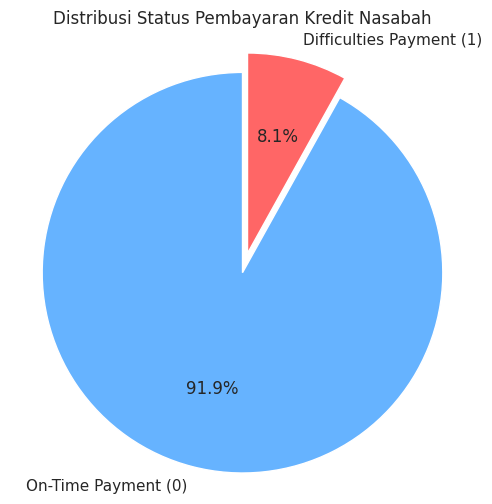

In [35]:
import matplotlib.pyplot as plt

# Hitung jumlah masing-masing kelas
target_counts = df_train['TARGET'].value_counts()

# Label sesuai konteks bisnis Home Credit
labels = ['On-Time Payment (0)', 'Difficulties Payment (1)']
colors = ['#66b3ff', '#ff6666']

# Buat pie chart
plt.figure(figsize=(6,6))
plt.pie(target_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, explode=(0, 0.1))
plt.title('Distribusi Status Pembayaran Kredit Nasabah')
plt.axis('equal')  # Supaya pie chart berbentuk lingkaran
plt.show()


### 🧾 Interpretasi Kolom `TARGET`:

* **0 = On-Time Payment**: Nasabah membayar pinjaman tepat waktu.
* **1 = Difficulties Payment**: Nasabah mengalami keterlambatan atau gagal membayar (default).

---

### 📊 Distribusi Data:

* **91.9%** nasabah melakukan **pembayaran tepat waktu** (`TARGET = 0`)
* **8.1%** nasabah mengalami **kesulitan dalam pembayaran** (`TARGET = 1`)

---

### 🧠 Kesimpulan & Implikasi untuk Machine Learning:

#### ✅ 1. **Imbalanced Data**

* Data sangat **tidak seimbang** (imbalance), karena mayoritas nasabah membayar tepat waktu.
* Ini bisa menyebabkan **model bias** terhadap kelas mayoritas (`0`), sehingga perlu teknik khusus.

#### 🔧 2. **Rekomendasi Pra-Pemodelan:**

* **Gunakan teknik penyeimbangan data**:

  * *Oversampling* (seperti SMOTE)
  * *Undersampling*
* **Gunakan metrik evaluasi yang sensitif terhadap ketidakseimbangan kelas**, seperti:

  * F1-score
  * ROC-AUC
  * Precision-Recall

#### 💡 3. **Modeling Focus**

* Fokus model: **Memprediksi kelas minoritas (default = 1)** dengan akurat karena secara bisnis ini lebih penting.


# **Exploratory Data Analysis**

# Descriptive Statistics

In [36]:
# Pisahkan kolom numerikal dan kategorikal
num_cols = df_train.select_dtypes(exclude='object').columns.tolist()
cat_cols = df_train.select_dtypes(include='object').columns.tolist()

print("Kolom Numerikal:", num_cols)
print("Kolom Kategorikal:", cat_cols)


Kolom Numerikal: ['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATA

In [37]:
import pandas as pd

pd.set_option('display.max_columns', None)  # tampilkan semua kolom
pd.set_option('display.max_rows', None)     # tampilkan semua baris

In [38]:
# Menampilkan semua kolom tanpa terpotong
pd.set_option('display.max_columns', None)
df_train[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,307511.0,278180.518577,102790.175348,1.000020e+05,189145.500000,278202.000000,367142.500000,4.562550e+05
TARGET,307511.0,0.080729,0.272419,0.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
CNT_CHILDREN,307511.0,0.417052,0.722121,0.000000e+00,0.000000,0.000000,1.000000,1.900000e+01
AMT_INCOME_TOTAL,307511.0,168797.919297,237123.146279,2.565000e+04,112500.000000,147150.000000,202500.000000,1.170000e+08
AMT_CREDIT,307511.0,599025.999706,402490.776996,4.500000e+04,270000.000000,513531.000000,808650.000000,4.050000e+06
AMT_ANNUITY,307499.0,27108.573909,14493.737315,1.615500e+03,16524.000000,24903.000000,34596.000000,2.580255e+05
AMT_GOODS_PRICE,307233.0,538396.207429,369446.460540,4.050000e+04,238500.000000,450000.000000,679500.000000,4.050000e+06
REGION_POPULATION_RELATIVE,307511.0,0.020868,0.013831,2.900000e-04,0.010006,0.018850,0.028663,7.250800e-02
DAYS_BIRTH,307511.0,-16036.995067,4363.988632,-2.522900e+04,-19682.000000,-15750.000000,-12413.000000,-7.489000e+03
DAYS_EMPLOYED,307511.0,63815.045904,141275.766519,-1.791200e+04,-2760.000000,-1213.000000,-289.000000,3.652430e+05


In [39]:
# Statistik deskriptif untuk kolom kategorikal
df_train[cat_cols].describe().T


,count,unique,top,freq
NAME_CONTRACT_TYPE,307511,2,Cash loans,278232
CODE_GENDER,307511,3,F,202448
FLAG_OWN_CAR,307511,2,N,202924
FLAG_OWN_REALTY,307511,2,Y,213312
NAME_TYPE_SUITE,306219,7,Unaccompanied,248526
NAME_INCOME_TYPE,307511,8,Working,158774
NAME_EDUCATION_TYPE,307511,5,Secondary / secondary special,218391
NAME_FAMILY_STATUS,307511,6,Married,196432
NAME_HOUSING_TYPE,307511,6,House / apartment,272868
OCCUPATION_TYPE,211120,18,Laborers,55186


### 🧾 **Gambaran Umum (Fitur Kategorikal):**

1. **Sebagian besar fitur memiliki data lengkap**, tetapi beberapa (seperti `OCCUPATION_TYPE`, `FONDKAPREMONT_MODE`, dll.) memiliki banyak nilai yang hilang (missing).
2. Banyak fitur **didominasi oleh satu kategori utama**, menunjukkan ketimpangan distribusi atau dominasi mode.

---

### 🧩 **Ringkasan Per Kolom:**

* **`NAME_CONTRACT_TYPE`**: 91% merupakan *Cash loans* → Sangat didominasi oleh satu jenis pinjaman.
* **`CODE_GENDER`**: Mayoritas *perempuan (F)* → Ada sedikit ketimpangan gender.
* **`FLAG_OWN_CAR` / `FLAG_OWN_REALTY`**: Banyak nasabah tidak punya mobil, tapi punya properti → Bisa menggambarkan profil keuangan.
* **`NAME_TYPE_SUITE`**: Mayoritas mengajukan pinjaman *sendiri (Unaccompanied)* → Umumnya apply individu.
* **`NAME_INCOME_TYPE`**: Mayoritas berstatus *Working* → Mayoritas memiliki pekerjaan tetap.
* **`NAME_EDUCATION_TYPE`**: Didominasi oleh *pendidikan menengah* → Variasi tingkat pendidikan rendah.
* **`NAME_FAMILY_STATUS`**: Mayoritas *menikah* → Bisa berkaitan dengan stabilitas finansial.
* **`NAME_HOUSING_TYPE`**: Umumnya tinggal di *rumah atau apartemen* → Lingkungan tinggal umum.
* **`OCCUPATION_TYPE`**: Hilang pada \~30% data. Dari yang tersedia, *buruh (Laborers)* paling banyak.
* **`WEEKDAY_APPR_PROCESS_START`**: Pengajuan tersebar, terbanyak di *Selasa*.
* **`ORGANIZATION_TYPE`**: Sangat bervariasi (58 jenis), tapi paling banyak *Business Entity Type 3*.
* **`FONDKAPREMONT_MODE`, `HOUSETYPE_MODE`, `WALLSMATERIAL_MODE`, `EMERGENCYSTATE_MODE`**: Banyak nilai hilang, tetapi kategori tertentu sangat dominan pada data yang tersedia.


# **EDA Kolom Numerikal**

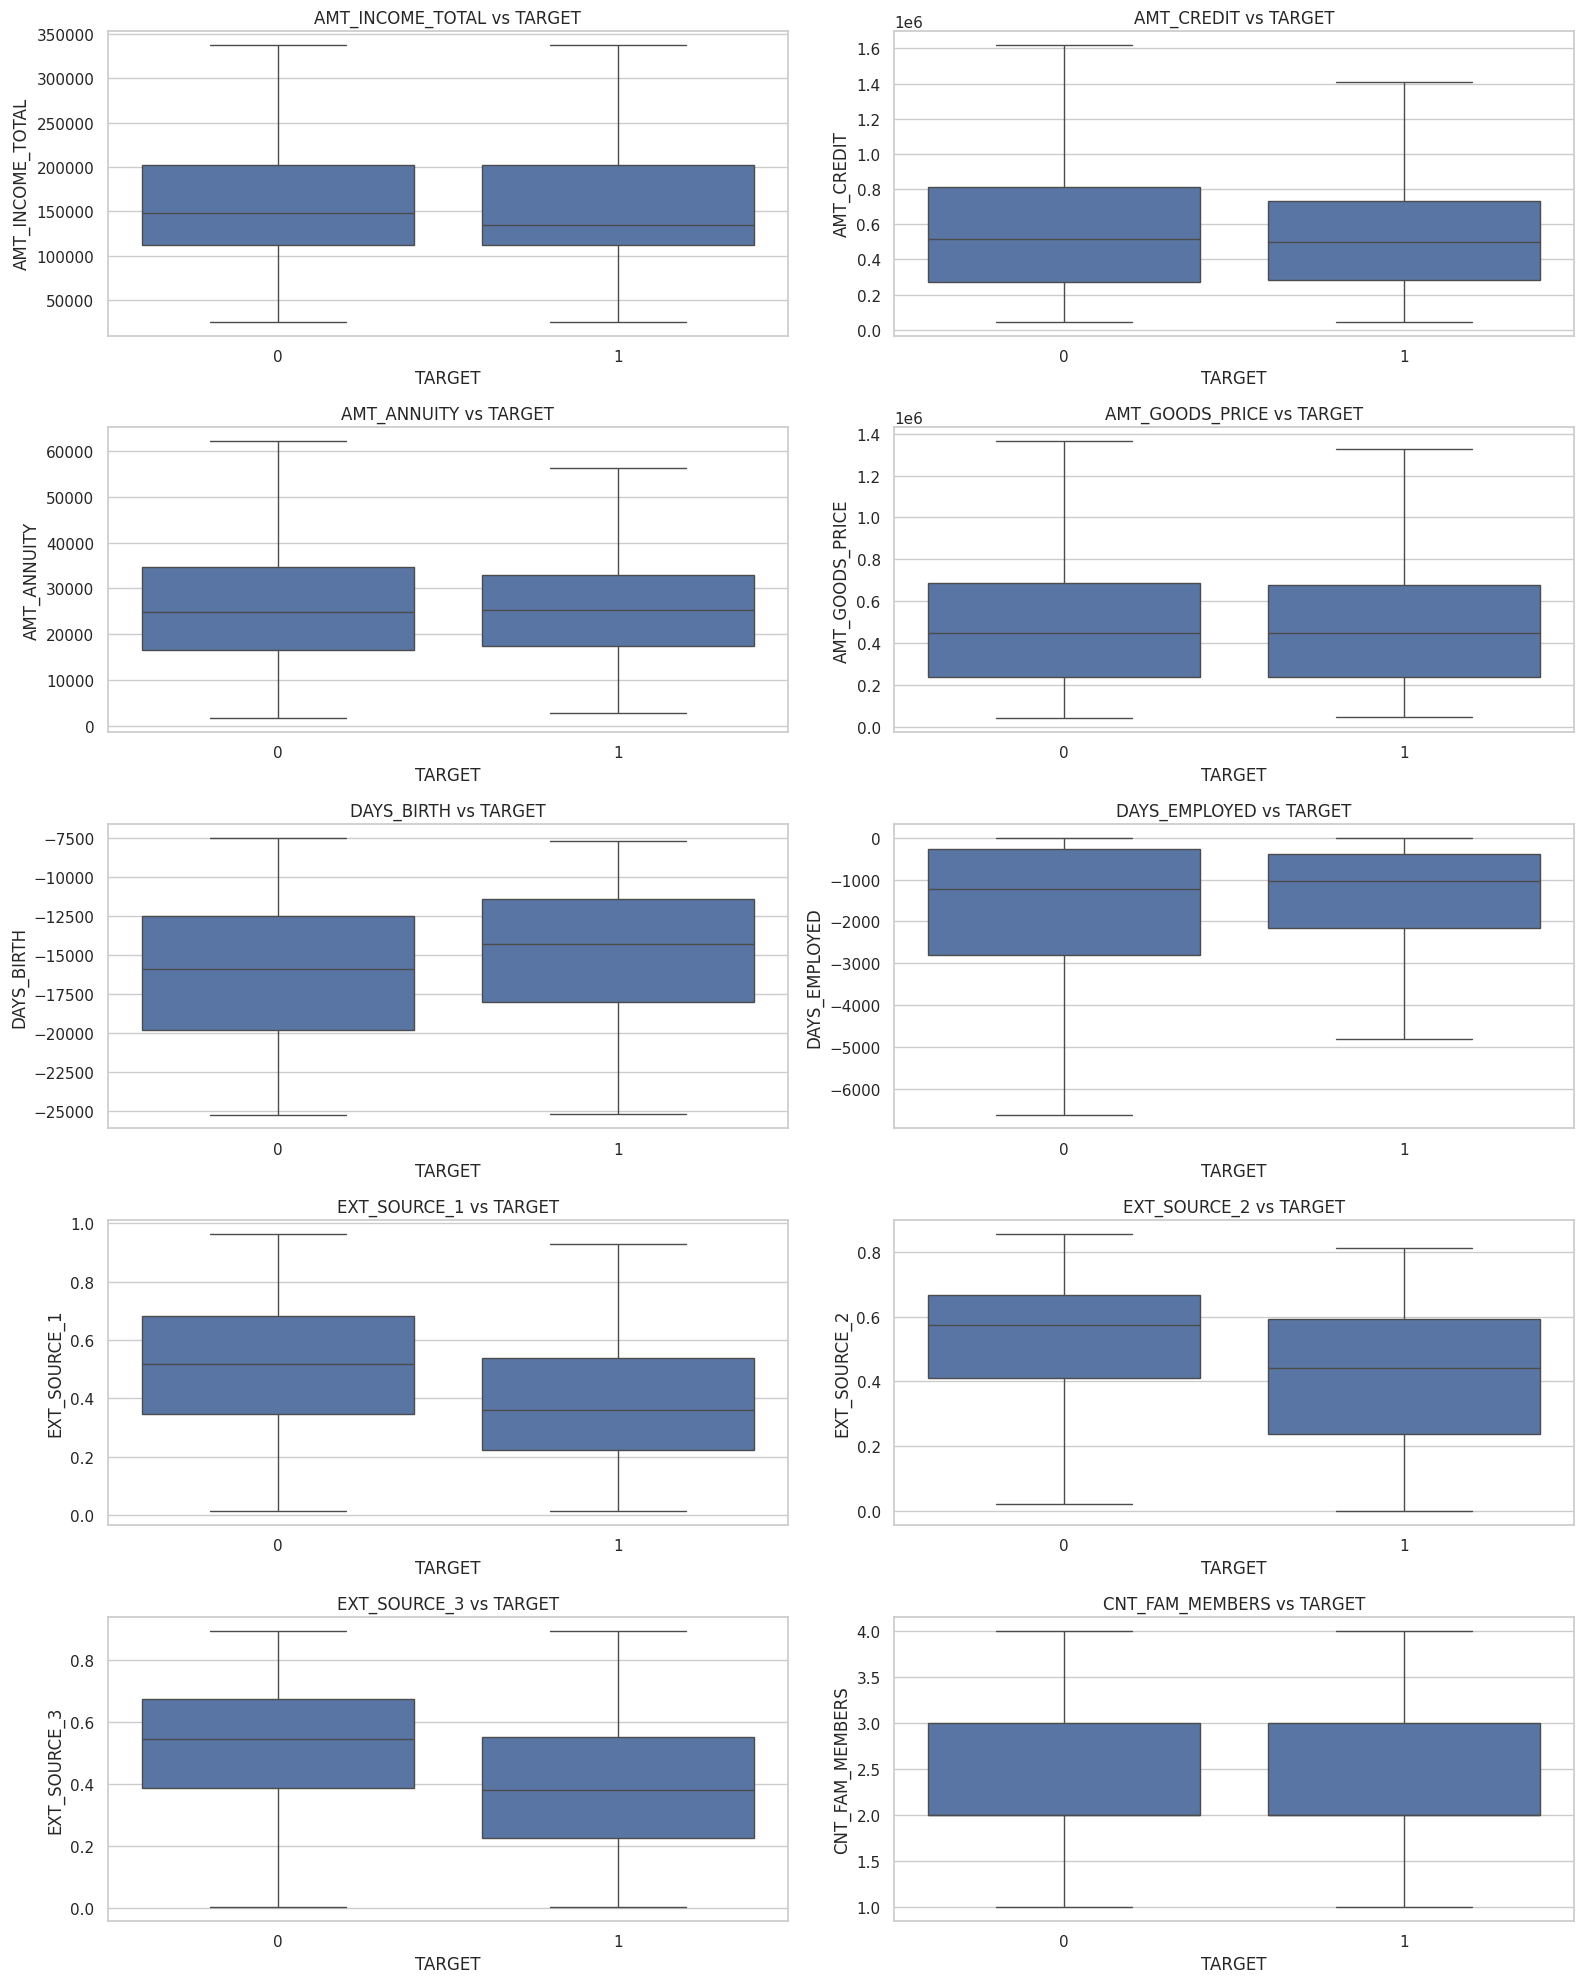

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Daftar kolom numerikal yang penting untuk divisualisasikan
cols_num = [
    'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
    'AMT_GOODS_PRICE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
    'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'CNT_FAM_MEMBERS'
]

# Ukuran plot dan subplots
n_cols = 2
n_rows = (len(cols_num) + 1) // n_cols

plt.figure(figsize=(16, 4 * n_rows))

# Plot setiap kolom numerikal
for i, col in enumerate(cols_num, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(x='TARGET', y=col, data=df_train, showfliers=False)
    plt.title(f'{col} vs TARGET', fontsize=12)
    plt.tight_layout()

plt.show()


### ✅ **Kesimpulan**

* **Fitur paling informatif:** `EXT_SOURCE_1`, `EXT_SOURCE_2`, `EXT_SOURCE_3` → perbedaan median dan distribusi sangat jelas antara TARGET.
* **Fitur moderat:** `DAYS_BIRTH` (debitur muda cenderung gagal bayar), `DAYS_EMPLOYED` (masa kerja singkat = lebih berisiko).
* **Fitur kurang informatif:** `AMT_INCOME_TOTAL`, `AMT_ANNUITY`, `CNT_FAM_MEMBERS` → median dan sebaran hampir sama → **tidak membedakan TARGET** secara signifikan.


# **EDA Kolom Kategorikal**

<ipython-input-41-4c8b2644bec9>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_train, x=col, order=df_train[col].value_counts().index, palette="Set2")


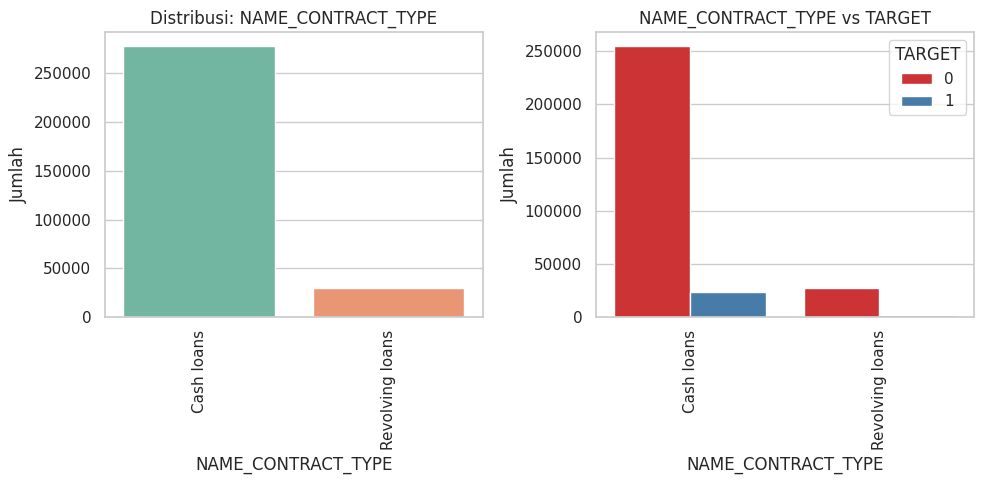

<ipython-input-41-4c8b2644bec9>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_train, x=col, order=df_train[col].value_counts().index, palette="Set2")


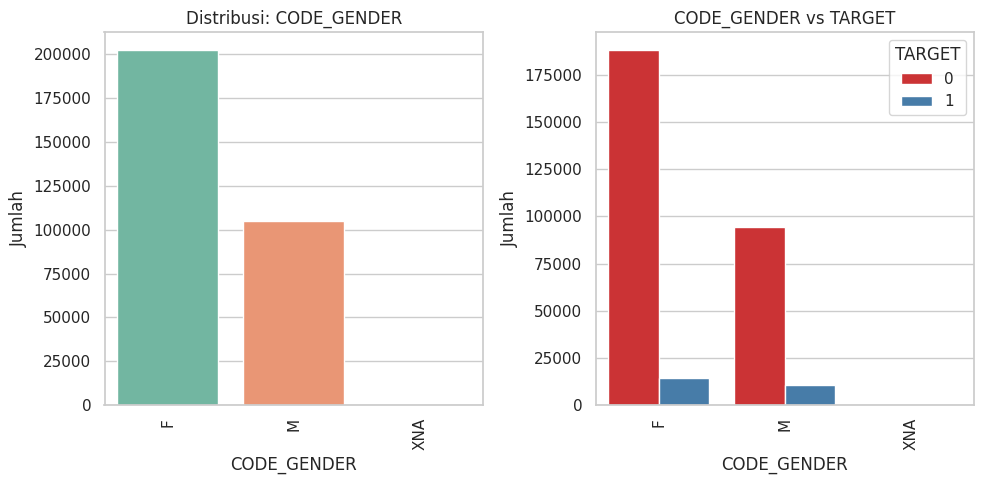

<ipython-input-41-4c8b2644bec9>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_train, x=col, order=df_train[col].value_counts().index, palette="Set2")


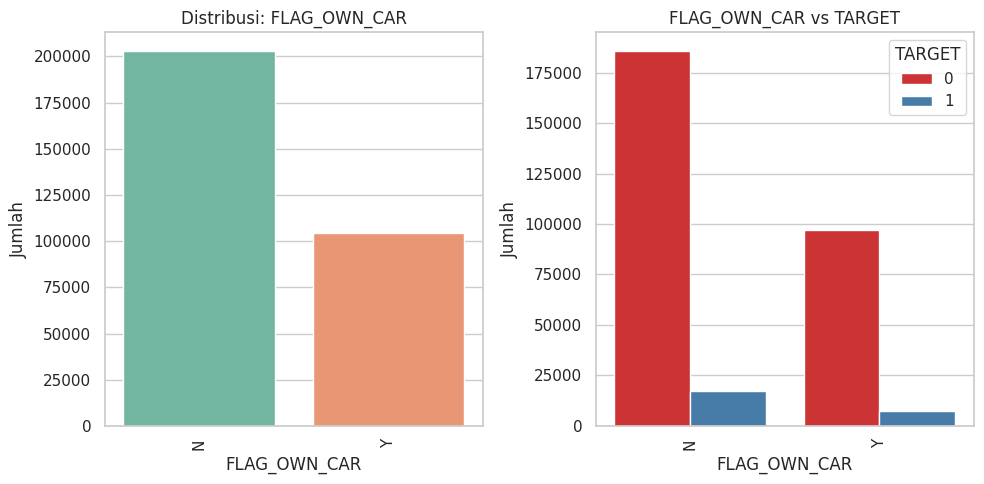

<ipython-input-41-4c8b2644bec9>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_train, x=col, order=df_train[col].value_counts().index, palette="Set2")


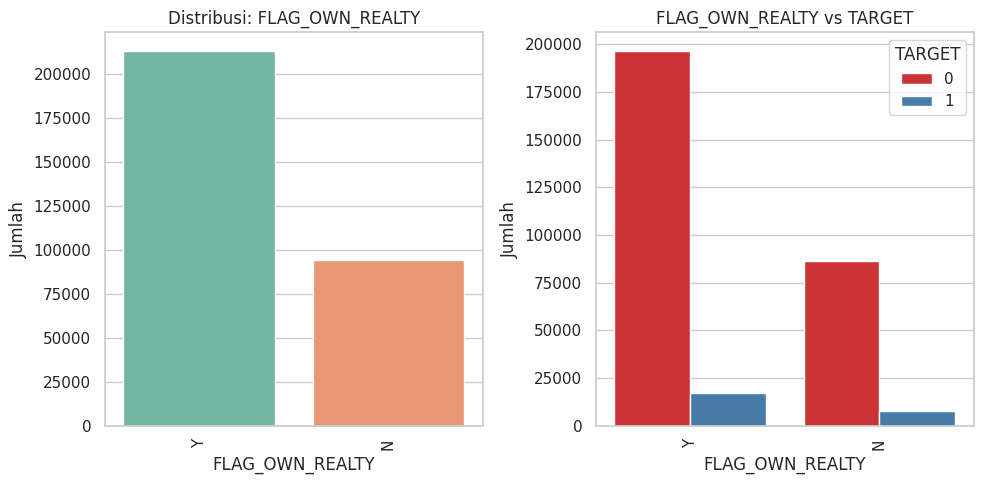

<ipython-input-41-4c8b2644bec9>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_train, x=col, order=df_train[col].value_counts().index, palette="Set2")


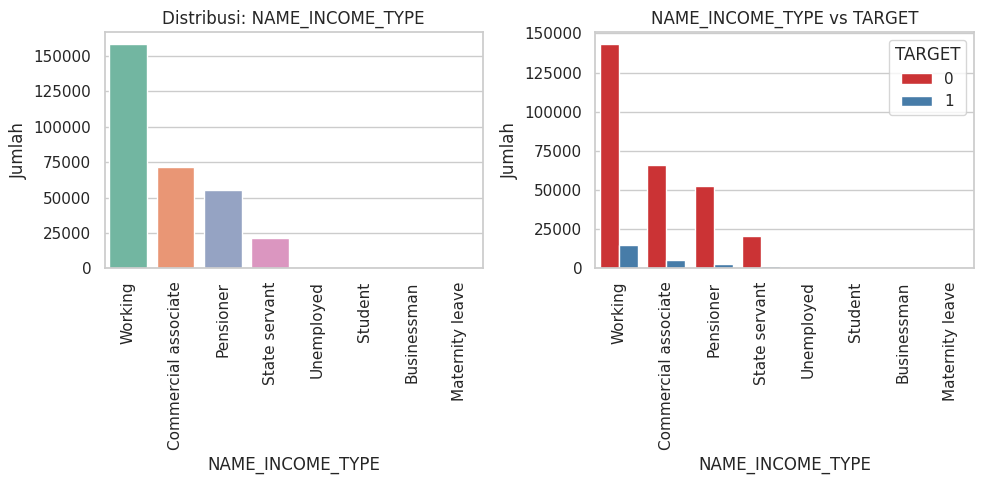

<ipython-input-41-4c8b2644bec9>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_train, x=col, order=df_train[col].value_counts().index, palette="Set2")


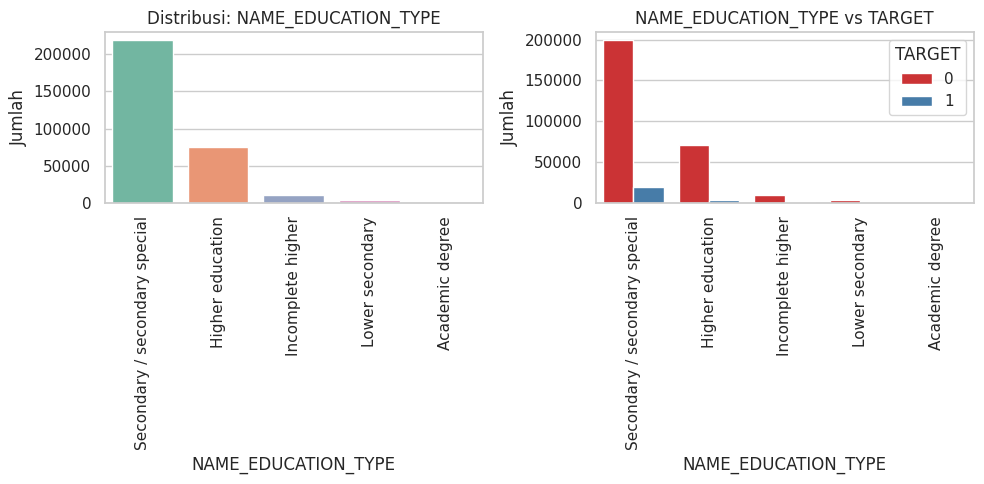

<ipython-input-41-4c8b2644bec9>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_train, x=col, order=df_train[col].value_counts().index, palette="Set2")


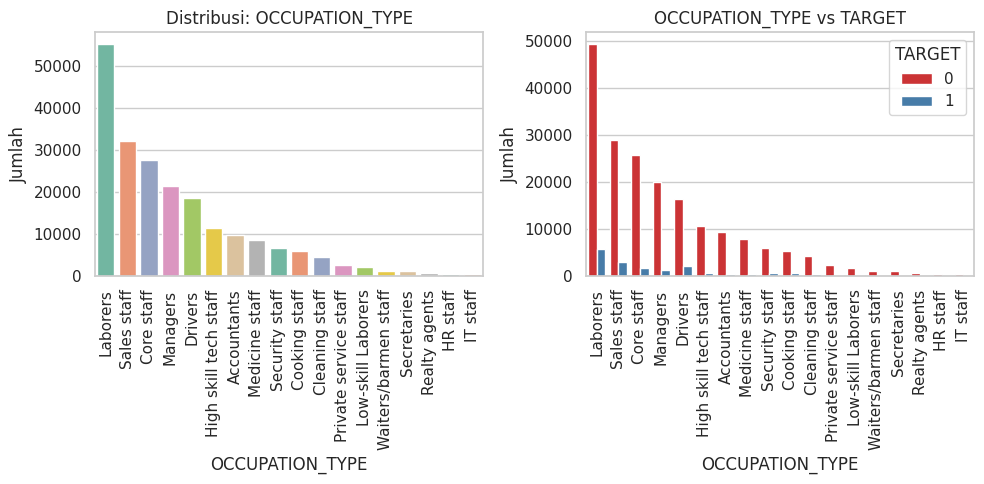

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Atur style visualisasi
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# Daftar kolom kategorikal penting
important_cat_cols = [
    'NAME_CONTRACT_TYPE',
    'CODE_GENDER',
    'FLAG_OWN_CAR',
    'FLAG_OWN_REALTY',
    'NAME_INCOME_TYPE',
    'NAME_EDUCATION_TYPE',
    'OCCUPATION_TYPE'
]

# Buat visualisasi distribusi dan perbandingan terhadap TARGET
for col in important_cat_cols:
    plt.figure(figsize=(10, 5))

    # Plot distribusi nilai
    plt.subplot(1, 2, 1)
    sns.countplot(data=df_train, x=col, order=df_train[col].value_counts().index, palette="Set2")
    plt.xticks(rotation=90)
    plt.title(f'Distribusi: {col}')
    plt.xlabel(col)
    plt.ylabel('Jumlah')

    # Plot distribusi dengan TARGET
    plt.subplot(1, 2, 2)
    sns.countplot(data=df_train, x=col, hue='TARGET', order=df_train[col].value_counts().index, palette="Set1")
    plt.xticks(rotation=90)
    plt.title(f'{col} vs TARGET')
    plt.xlabel(col)
    plt.ylabel('Jumlah')

    plt.tight_layout()
    plt.show()


### 📊 **Rangkuman EDA Fitur Kategorikal**

#### 1. 🧾 **Jenis Kontrak (NAME\_CONTRACT\_TYPE)**

* Mayoritas nasabah memilih **Cash loans**.
* **Proporsi gagal bayar lebih tinggi** pada *Cash loans* dibandingkan *Revolving loans*.
* 👉 *Cash loans memiliki risiko kredit yang lebih tinggi.*

#### 2. 🚻 **Jenis Kelamin (CODE\_GENDER)**

* Peminjam didominasi oleh **perempuan**.
* Perempuan memiliki **proporsi gagal bayar sedikit lebih tinggi** dibanding laki-laki.
* 👉 *Perbedaan antar gender tidak signifikan terhadap risiko kredit.*

#### 3. 🚗 **Kepemilikan Mobil (FLAG\_OWN\_CAR)**

* Mayoritas **tidak memiliki mobil**.
* Peminjam tanpa mobil menunjukkan **tingkat gagal bayar lebih tinggi**.
* 👉 *Kepemilikan mobil bisa menjadi indikator kapasitas finansial yang lebih baik.*

#### 4. 🏠 **Kepemilikan Properti (FLAG\_OWN\_REALTY)**

* Sebagian besar nasabah **memiliki properti**.
* Nasabah dengan properti memiliki **tingkat gagal bayar lebih rendah**.
* 👉 *Kepemilikan properti berpotensi menunjukkan stabilitas finansial.*

#### 5. 👷‍♂️ **Tipe Pekerjaan (NAME\_INCOME\_TYPE)**

* Terbanyak berasal dari kategori **Working** dan **Commercial associate**.
* **Pensioner** dan **State servant** menunjukkan **risiko gagal bayar lebih rendah**.
* 👉 *Jenis pekerjaan stabil cenderung menurunkan risiko kredit.*

#### 6. 🎓 **Tingkat Pendidikan (NAME\_EDUCATION\_TYPE)**

* Mayoritas lulusan **Secondary education**, dengan kontribusi tertinggi pada gagal bayar.
* **Higher education** memiliki **proporsi gagal bayar lebih rendah**.
* 👉 *Semakin tinggi pendidikan, risiko gagal bayar cenderung menurun.*

#### 7. 💼 **Jenis Pekerjaan (OCCUPATION\_TYPE)**

* **Laborers, Sales staff**, dan **Core staff** paling banyak dan berisiko tinggi.
* Profesi seperti **IT staff** dan **HR staff** memiliki **risiko gagal bayar rendah**.
* 👉 *Jenis pekerjaan berhubungan erat dengan risiko kredit.*

---

### 🔍 **Insight Akhir**

Fitur-fitur kategorikal seperti **jenis kontrak**, **status kepemilikan aset (mobil & properti)**, **jenis pekerjaan**, dan **tingkat pendidikan** menunjukkan pengaruh yang cukup kuat terhadap kemungkinan gagal bayar nasabah. Hal ini memberikan sinyal penting bahwa variabel-variabel tersebut **dapat dijadikan fitur prioritas dalam pengembangan model prediksi risiko kredit**, serta menjadi acuan dalam strategi mitigasi risiko perusahaan pembiayaan.


# **Data Cleaning**

# Cek Missing Values

In [42]:
# Cek jumlah missing values di setiap kolom
print(df_train.isnull().sum())

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

### 🔍 **1. Fitur dengan Missing Value Rendah (bisa dipertimbangkan untuk imputasi)**

* Contoh:

  * `AMT_ANNUITY` → 12 missing
  * `AMT_GOODS_PRICE` → 278 missing
  * `NAME_TYPE_SUITE` → 1.292 missing
  * `EXT_SOURCE_2` → 660 missing

➡️ **Insight:**
Fitur-fitur ini memiliki missing value <1% dan **masih bisa dipertahankan dengan imputasi sederhana** seperti median

---

### 🚨 **2. Fitur dengan Missing Value Sangat Tinggi (>50%)**

* Contoh:

  * `OWN_CAR_AGE` → 202.929 missing
  * `EXT_SOURCE_1` → 173.378 missing
  * `BASEMENTAREA_AVG`, `COMMONAREA_*`, `YEARS_BUILD_*`, dll → >50% missing
  * `FONDKAPREMONT_MODE`, `WALLSMATERIAL_MODE`, `HOUSETYPE_MODE` → missing >50%

➡️ **Insight:**
Fitur-fitur ini memiliki missing value ekstrem (bahkan >70%).

* Bisa disebabkan oleh **data yang tidak tersedia untuk semua peminjam** (misalnya, tidak semua tinggal di apartemen).
* **Perlu dipertimbangkan untuk dibuang**

---

### 🧱 **3. Banyak Fitur Duplikat Statistik (AVG, MODE, MEDI)**

* Terdapat pola pengulangan: `APARTMENTS_AVG`, `APARTMENTS_MODE`, `APARTMENTS_MEDI` dan sejenisnya.

➡️ **Insight:**

* Cek korelasi antar kolom ini sebelum memilih.

---

### 💼 **4. Fitur Sosial dan Eksternal (Social Circle & EXT\_SOURCE)**

* Fitur `OBS_30_CNT_SOCIAL_CIRCLE`, `DEF_60_CNT_SOCIAL_CIRCLE`, dan `EXT_SOURCE_*` berkaitan dengan sumber eksternal dan jaringan sosial.

➡️ **Insight:**

* Fitur `EXT_SOURCE_1/2/3` terbukti sangat berguna di model kredit scoring (misalnya di dataset Home Credit Default Risk).
* Perlu **imputasi yang cermat atau pembuatan fitur baru**

---

### 🔧 **5. Fitur Biro Kredit (`AMT_REQ_CREDIT_BUREAU_*`)**

* Semua kolom ini memiliki 41.519 missing values (sekitar 20%).

➡️ **Insight:**

* Kemungkinan besar hanya tersedia untuk sebagian peminjam yang sudah pernah berinteraksi dengan biro kredit.

In [43]:
# --- 1. IMPUTASI ---

# Imputasi dengan median (untuk numeric) dan modus (untuk kategorikal)
impute_median_cols = [
    'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
    'CNT_FAM_MEMBERS', 'OWN_CAR_AGE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
    'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE',
    'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
    'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'
]

for col in impute_median_cols:
    if col in df_train.columns:
        df_train[col].fillna(df_train[col].median(), inplace=True)

# Imputasi kategorikal
if 'NAME_TYPE_SUITE' in df_train.columns:
    df_train['NAME_TYPE_SUITE'].fillna(df_train['NAME_TYPE_SUITE'].mode()[0], inplace=True)

# Imputasi OCCUPATION_TYPE dengan "Unknown"
if 'OCCUPATION_TYPE' in df_train.columns:
    df_train['OCCUPATION_TYPE'].fillna("Unknown", inplace=True)


# --- 2. DROP KOLOM ---

drop_cols = [
    'EXT_SOURCE_1','APARTMENTS_AVG', 'APARTMENTS_MODE', 'APARTMENTS_MEDI',
    'BASEMENTAREA_AVG', 'BASEMENTAREA_MODE', 'BASEMENTAREA_MEDI',
    'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BEGINEXPLUATATION_MEDI',
    'YEARS_BUILD_AVG', 'YEARS_BUILD_MODE', 'YEARS_BUILD_MEDI',
    'COMMONAREA_AVG', 'COMMONAREA_MODE', 'COMMONAREA_MEDI',
    'ELEVATORS_AVG', 'ELEVATORS_MODE', 'ELEVATORS_MEDI',
    'ENTRANCES_AVG', 'ENTRANCES_MODE', 'ENTRANCES_MEDI',
    'FLOORSMAX_AVG', 'FLOORSMAX_MODE', 'FLOORSMAX_MEDI',
    'FLOORSMIN_AVG', 'FLOORSMIN_MODE', 'FLOORSMIN_MEDI',
    'LANDAREA_AVG', 'LANDAREA_MODE', 'LANDAREA_MEDI',
    'LIVINGAPARTMENTS_AVG', 'LIVINGAPARTMENTS_MODE', 'LIVINGAPARTMENTS_MEDI',
    'LIVINGAREA_AVG', 'LIVINGAREA_MODE', 'LIVINGAREA_MEDI',
    'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_MEDI',
    'NONLIVINGAREA_AVG', 'NONLIVINGAREA_MODE', 'NONLIVINGAREA_MEDI',
    'TOTALAREA_MODE', 'WALLSMATERIAL_MODE', 'FONDKAPREMONT_MODE',
    'HOUSETYPE_MODE', 'EMERGENCYSTATE_MODE'
]

df_train.drop(columns=[col for col in drop_cols if col in df_train.columns], inplace=True)

<ipython-input-43-751a42a00270>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train[col].fillna(df_train[col].median(), inplace=True)
<ipython-input-43-751a42a00270>:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

In [44]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307511 non-null  float64
 10  AMT_GOODS_PRICE              307511 non-null  float64
 11  NAME_TYPE_SUITE              307511 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [45]:
df_train.isnull().sum().sort_values(ascending=False)

,0
SK_ID_CURR,0
TARGET,0
NAME_CONTRACT_TYPE,0
CODE_GENDER,0
FLAG_OWN_CAR,0
FLAG_OWN_REALTY,0
CNT_CHILDREN,0
AMT_INCOME_TOTAL,0
AMT_CREDIT,0
AMT_ANNUITY,0


# Cek Duplikasi Data

In [46]:
# Mengecek jumlah baris duplikat
duplicate_rows = df_train.duplicated().sum()
print(f"Jumlah duplikasi: {duplicate_rows}")


Jumlah duplikasi: 0


# **Feature Engineering**

In [47]:
# Hapus baris yang memiliki nilai 'XNA' di kolom CODE_GENDER
df_train = df_train[df_train['CODE_GENDER'] != 'XNA']

In [49]:
# 1. Mapping kolom biner (object) menjadi integer
df_train['CODE_GENDER'] = df_train['CODE_GENDER'].map({'M': 0, 'F': 1}).astype('int')
df_train['FLAG_OWN_CAR'] = df_train['FLAG_OWN_CAR'].map({'N': 0, 'Y': 1}).astype('int')
df_train['FLAG_OWN_REALTY'] = df_train['FLAG_OWN_REALTY'].map({'N': 0, 'Y': 1}).astype('int')

# 2. Konversi kolom kategorikal menjadi tipe data category
# Penjelasan: kolom-kolom ini berisi string kategori, dan 'category' akan menghemat memori serta mempercepat proses modeling.
category_cols = [
    'NAME_CONTRACT_TYPE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
    'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
    'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE'
]

for col in category_cols:
    df_train[col] = df_train[col].astype('category')

# **Feature Encoding**

In [50]:
# Buat dataset baru 'data'
data = df_train.copy()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 307507 entries, 0 to 307510
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307507 non-null  int64   
 1   TARGET                       307507 non-null  int64   
 2   NAME_CONTRACT_TYPE           307507 non-null  category
 3   CODE_GENDER                  307507 non-null  int64   
 4   FLAG_OWN_CAR                 307507 non-null  int64   
 5   FLAG_OWN_REALTY              307507 non-null  int64   
 6   CNT_CHILDREN                 307507 non-null  int64   
 7   AMT_INCOME_TOTAL             307507 non-null  float64 
 8   AMT_CREDIT                   307507 non-null  float64 
 9   AMT_ANNUITY                  307507 non-null  float64 
 10  AMT_GOODS_PRICE              307507 non-null  float64 
 11  NAME_TYPE_SUITE              307507 non-null  category
 12  NAME_INCOME_TYPE             307507 non-null  cat

In [51]:
# Memilih hanya kolom kategorikal
cat_columns = data.select_dtypes(include='category').columns

# Menampilkan deskripsi statistik kolom kategorikal
data[cat_columns].describe().transpose()

,count,unique,top,freq
NAME_CONTRACT_TYPE,307507,2,Cash loans,278232
NAME_TYPE_SUITE,307507,7,Unaccompanied,249815
NAME_INCOME_TYPE,307507,8,Working,158771
NAME_EDUCATION_TYPE,307507,5,Secondary / secondary special,218389
NAME_FAMILY_STATUS,307507,6,Married,196429
NAME_HOUSING_TYPE,307507,6,House / apartment,272865
OCCUPATION_TYPE,307507,19,Unknown,96389
WEEKDAY_APPR_PROCESS_START,307507,7,TUESDAY,53900
ORGANIZATION_TYPE,307507,58,Business Entity Type 3,67992


In [52]:
data['ORGANIZATION_TYPE'].value_counts()

,count
ORGANIZATION_TYPE,
Business Entity Type 3,67992
XNA,55374
Self-employed,38412
Other,16683
Medicine,11192
Business Entity Type 2,10553
Government,10404
School,8893
Trade: type 7,7831


**Label Encoding & One Hot Encoding**

In [53]:
import pandas as pd

df_encoded = data.copy()

# Drop fitur yang tidak relevan atau high cardinality
df_encoded.drop(columns=['OCCUPATION_TYPE', 'ORGANIZATION_TYPE'], inplace=True)

# Label encoding untuk NAME_EDUCATION_TYPE (ordinal)
edu_order = {
    'Lower secondary': 0,
    'Secondary / secondary special': 1,
    'Incomplete higher': 2,
    'Higher education': 3,
    'Academic degree': 4
}
df_encoded['NAME_EDUCATION_TYPE'] = df_encoded['NAME_EDUCATION_TYPE'].map(edu_order)

# One-hot encoding untuk kolom nominal
one_hot_cols = [
    'NAME_CONTRACT_TYPE',
    'NAME_TYPE_SUITE',
    'NAME_INCOME_TYPE',
    'NAME_FAMILY_STATUS',
    'NAME_HOUSING_TYPE',
    'WEEKDAY_APPR_PROCESS_START'
]

df_encoded = pd.get_dummies(df_encoded, columns=one_hot_cols, drop_first=True)

# Konversi semua kolom bertipe boolean menjadi integer 0/1
bool_cols = df_encoded.select_dtypes(include='bool').columns
df_encoded[bool_cols] = df_encoded[bool_cols].astype(int)

# Cek hasil
print("Shape after encoding:", df_encoded.shape)
df_encoded.head()


Shape after encoding: (307507, 96)


,SK_ID_CURR,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_EDUCATION_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_CONTRACT_TYPE_Revolving loans,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Unknown,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY
0,100002,1,0,0,1,0,202500.0,406597.5,24700.5,351000.0,1,0.018801,-9461,-637,-3648.0,-2120,9.0,1,1,0,1,1,0,1.0,2,2,10,0,0,0,0,0,0,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1
1,100003,0,1,0,0,0,270000.0,1293502.5,35698.5,1129500.0,3,0.003541,-16765,-1188,-1186.0,-291,9.0,1,1,0,1,1,0,2.0,1,1,11,0,0,0,0,0,0,0.622246,0.535276,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2,100004,0,0,1,1,0,67500.0,135000.0,6750.0,135000.0,1,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,1.0,2,2,9,0,0,0,0,0,0,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0
3,100006,0,1,0,1,0,135000.0,312682.5,29686.5,297000.0,1,0.008019,-19005,-3039,-9833.0,-2437,9.0,1,1,0,1,0,0,2.0,2,2,17,0,0,0,0,0,0,0.650442,0.535276,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
4,100007,0,0,0,1,0,121500.0,513000.0,21865.5,513000.0,1,0.028663,-19932,-3038,-4311.0,-3458,9.0,1,1,0,1,0,0,1.0,2,2,11,0,0,0,0,1,1,0.322738,0.535276,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0


Dalam proses encoding, fitur `NAME_EDUCATION_TYPE` diencoding menggunakan label encoding karena bersifat ordinal, menunjukkan jenjang pendidikan yang berurutan. Fitur-fitur seperti `NAME_CONTRACT_TYPE`, `NAME_TYPE_SUITE`, `NAME_INCOME_TYPE`, `NAME_FAMILY_STATUS`, `NAME_HOUSING_TYPE`, dan `WEEKDAY_APPR_PROCESS_START` diproses menggunakan one-hot encoding karena bersifat nominal tanpa urutan. Sementara itu, kolom `OCCUPATION_TYPE` dan `ORGANIZATION_TYPE` dihapus karena memiliki kategori yang terlalu banyak (high cardinality) serta mengandung banyak data tidak diketahui, sehingga berpotensi menambah noise dan tidak efisien untuk model. Semua hasil encoding one-hot kemudian diubah ke format numerik biner (0 dan 1).


# **Feature Selection**

### 📘 **Konsep: Mutual Information (MI)**

**Mutual Information** mengukur **seberapa banyak informasi** yang dimiliki oleh satu fitur (X) terhadap target (y). Artinya:

> **Semakin tinggi nilai MI antara fitur dan target, semakin informatif fitur tersebut untuk memprediksi target.**

Ciri khas Mutual Information:
- Bisa menangkap **hubungan non-linear** (tidak hanya korelasi linier).
- Bisa dipakai untuk **klasifikasi maupun regresi**.
- Nilai MI:
  - **0** → Tidak ada hubungan/informasi.
  - **Lebih besar dari 0** → Ada informasi.
  - **Tidak dibatasi atas** → Nilainya bisa lebih dari 1 tergantung skala data.

---

### 📌 **Langkah-langkah Menggunakan MI untuk Feature Selection**

1. Tentukan **X** (fitur) dan **y** (target).
2. Hitung **mutual information score** antara semua fitur di `X` terhadap `y`.
3. Urutkan dari yang paling informatif.
4. Pilih fitur terbaik berdasarkan nilai MI tertinggi

In [54]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd

# Pisahkan fitur dan target
X = df_encoded.drop(columns=['TARGET'])  # Ganti 'TARGET' jika nama target berbeda
y = df_encoded['TARGET']

# Hitung mutual information
mi_scores = mutual_info_classif(X, y, discrete_features='auto', random_state=42)

# Buat dataframe hasil skor
mi_df = pd.DataFrame({'Feature': X.columns, 'MI Score': mi_scores})
mi_df = mi_df.sort_values(by='MI Score', ascending=False).reset_index(drop=True)

# Tampilkan skor MI
print(mi_df)

                                    Feature  MI Score
0                                FLAG_MOBIL  0.080777
1                          FLAG_CONT_MOBILE  0.060684
2                               CODE_GENDER  0.056047
3                           FLAG_DOCUMENT_3  0.055846
4             NAME_TYPE_SUITE_Unaccompanied  0.055348
5                           FLAG_OWN_REALTY  0.055280
6                            FLAG_EMP_PHONE  0.055210
7                NAME_FAMILY_STATUS_Married  0.054021
8       NAME_HOUSING_TYPE_House / apartment  0.049697
9                  NAME_INCOME_TYPE_Working  0.045453
10                      NAME_EDUCATION_TYPE  0.033066
11                              OWN_CAR_AGE  0.029660
12              REGION_RATING_CLIENT_W_CITY  0.027525
13                     REGION_RATING_CLIENT  0.026561
14                          CNT_FAM_MEMBERS  0.024846
15                             FLAG_OWN_CAR  0.020499
16                             EXT_SOURCE_3  0.014891
17                          

In [55]:
# Mengambil 26 fitur teratas berdasarkan MI
top_25 = mi_df.head(26)['Feature'].tolist()

# Mengambil 5 fitur tambahan berdasarkan nilai MI di luar top 25
# dan relevansi terhadap prediksi
important_additional = [
    'AMT_CREDIT',            # Besar pinjaman → penting untuk credit scoring
    'AMT_GOODS_PRICE',       # Harga barang → mendukung AMT_CREDIT
    'CNT_CHILDREN',          # Jumlah tanggungan → mempengaruhi risiko
    'HOUR_APPR_PROCESS_START',  # Waktu pengajuan bisa mewakili urgensi
    'DAYS_BIRTH'             # Usia peminjam → penting secara umum
]

selected_features = list(set(top_25 + important_additional))

# Data akhir modeling
X_selected = df_encoded[selected_features]

print(f"Jumlah fitur terpilih: {len(selected_features)}")
print("Daftar fitur terpilih:")
print(selected_features)

Jumlah fitur terpilih: 30
Daftar fitur terpilih:
['REG_CITY_NOT_WORK_CITY', 'NAME_INCOME_TYPE_Commercial associate', 'AMT_GOODS_PRICE', 'REGION_RATING_CLIENT_W_CITY', 'NAME_TYPE_SUITE_Unaccompanied', 'NAME_HOUSING_TYPE_House / apartment', 'CODE_GENDER', 'EXT_SOURCE_2', 'DAYS_EMPLOYED', 'FLAG_OWN_CAR', 'REGION_RATING_CLIENT', 'NAME_FAMILY_STATUS_Married', 'FLAG_OWN_REALTY', 'EXT_SOURCE_3', 'OWN_CAR_AGE', 'FLAG_EMP_PHONE', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'HOUR_APPR_PROCESS_START', 'DAYS_BIRTH', 'AMT_ANNUITY', 'CNT_FAM_MEMBERS', 'AMT_CREDIT', 'NAME_INCOME_TYPE_Working', 'FLAG_DOCUMENT_3', 'NAME_EDUCATION_TYPE', 'FLAG_PHONE', 'NAME_INCOME_TYPE_Pensioner', 'CNT_CHILDREN', 'FLAG_CONT_MOBILE', 'FLAG_MOBIL']


# **Multivariate Analysis 2**

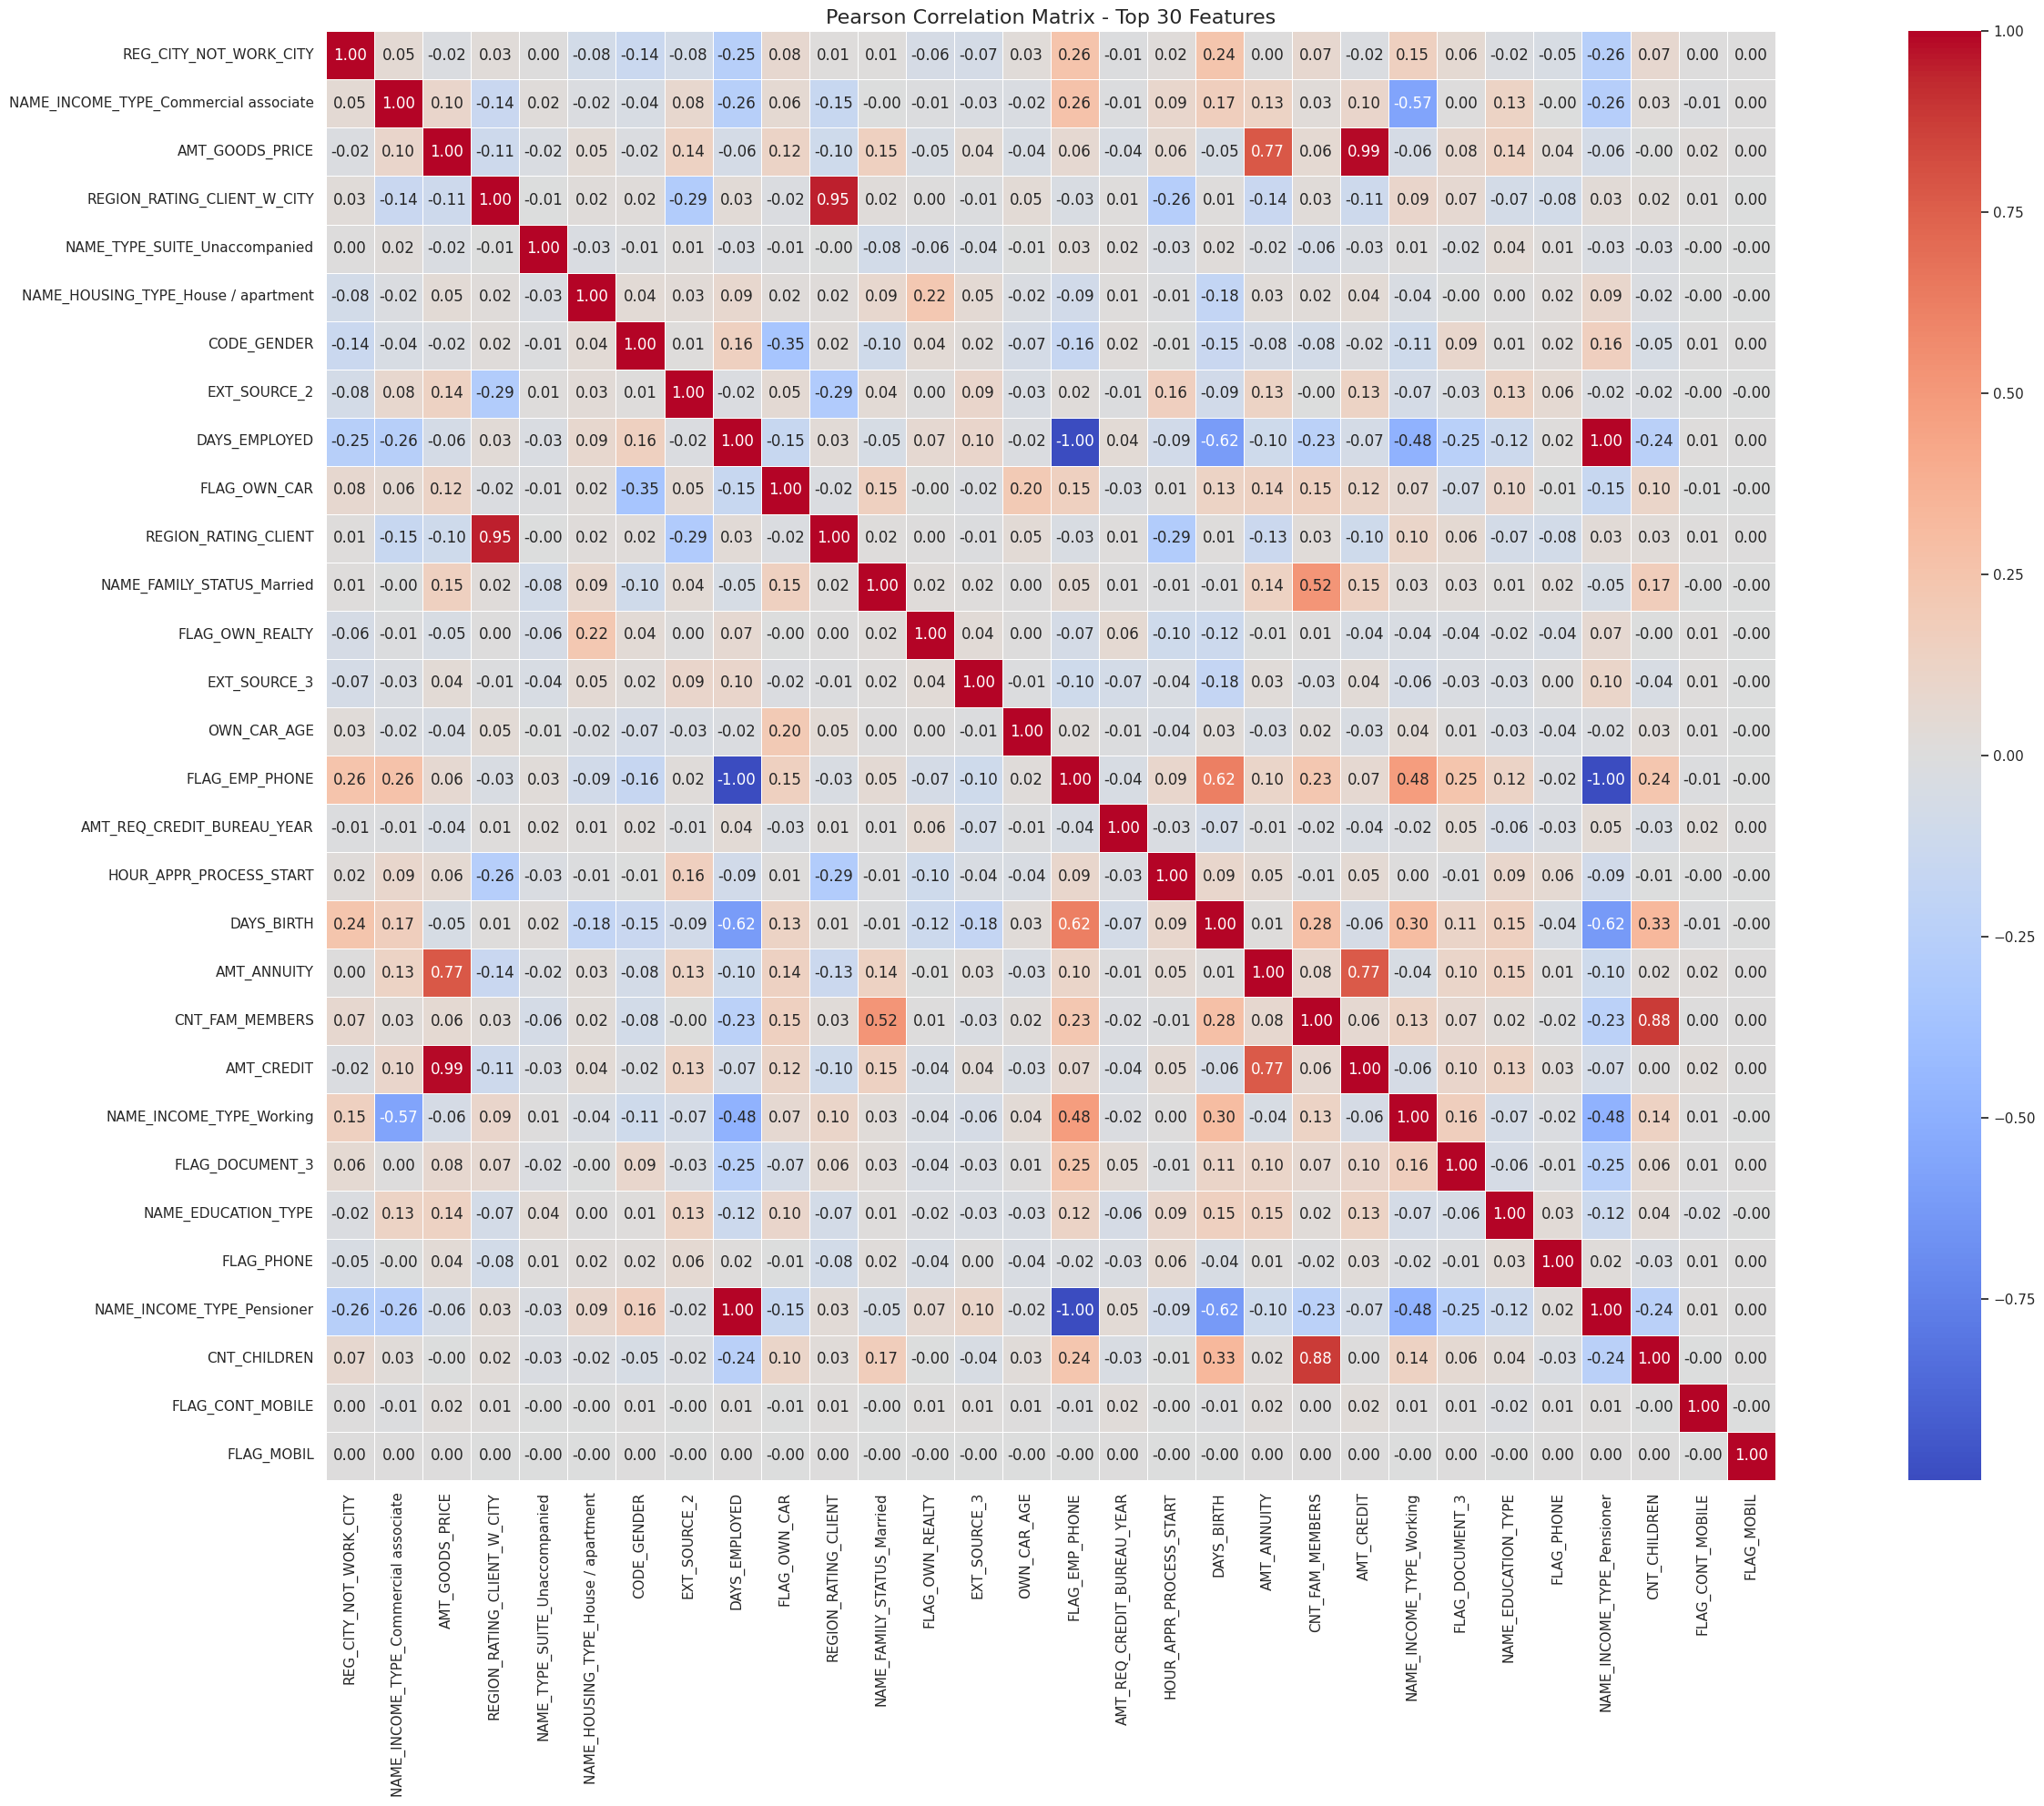

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

# Hitung korelasi Pearson
corr_matrix = X_selected.corr(method='pearson')

# Visualisasi korelasi dengan heatmap
plt.figure(figsize=(30, 20))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5)
plt.title('Pearson Correlation Matrix - Top 30 Features', fontsize=16)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


### 🔁 **Fitur dengan Korelasi Sangat Tinggi** (Drop salah satu):

1. **`FLAG_EMP_PHONE` vs. `DAYS_EMPLOYED` → -1.00**
   ✅ **Drop:** `FLAG_EMP_PHONE`
2. **`REGION_RATING_CLIENT` vs. `REGION_RATING_CLIENT_W_CITY` → 1.00**
   ✅ **Drop:** `REGION_RATING_CLIENT_W_CITY`
3. **`AMT_CREDIT` vs. `AMT_GOODS_PRICE` → 0.98**
   ✅ **Drop:** `AMT_GOODS_PRICE`

---

### ⚠️ **Korelasi Tinggi (Pertimbangan)**:

4. **`CNT_CHILDREN` vs. `CNT_FAM_MEMBERS` → 0.88**
   ✅ **Drop:** `CNT_CHILDREN`
5. **`EXT_SOURCE_2`, `EXT_SOURCE_3` → Korelasi sedang (0.5–0.6)**
   👉 Karena ketiganya masih dianggap penting, **dipertahankan dulu** (boleh nanti diseleksi pakai feature importance).
6. **`AMT_GOODS_PRICE` vs. `AMT_ANNUITY` → 0.77**
   ✅ Karena `AMT_GOODS_PRICE` sudah di-drop, **`AMT_ANNUITY` bisa dipertahankan**.

In [57]:
# Drop kolom dengan multikolinearitas tinggi
to_drop = [
    'FLAG_EMP_PHONE',
    'REGION_RATING_CLIENT_W_CITY',
    'AMT_GOODS_PRICE',
    'CNT_CHILDREN'
]

# Buat ulang selected_features tanpa fitur yang di-drop
selected_features = [f for f in selected_features if f not in to_drop]

# Ambil subset final untuk modeling
X_selected = df_encoded[selected_features].copy()

print(f"Jumlah fitur akhir: {len(selected_features)}")
print("Daftar fitur akhir:")
print(selected_features)

Jumlah fitur akhir: 26
Daftar fitur akhir:
['REG_CITY_NOT_WORK_CITY', 'NAME_INCOME_TYPE_Commercial associate', 'NAME_TYPE_SUITE_Unaccompanied', 'NAME_HOUSING_TYPE_House / apartment', 'CODE_GENDER', 'EXT_SOURCE_2', 'DAYS_EMPLOYED', 'FLAG_OWN_CAR', 'REGION_RATING_CLIENT', 'NAME_FAMILY_STATUS_Married', 'FLAG_OWN_REALTY', 'EXT_SOURCE_3', 'OWN_CAR_AGE', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'HOUR_APPR_PROCESS_START', 'DAYS_BIRTH', 'AMT_ANNUITY', 'CNT_FAM_MEMBERS', 'AMT_CREDIT', 'NAME_INCOME_TYPE_Working', 'FLAG_DOCUMENT_3', 'NAME_EDUCATION_TYPE', 'FLAG_PHONE', 'NAME_INCOME_TYPE_Pensioner', 'FLAG_CONT_MOBILE', 'FLAG_MOBIL']


# **Split Data**

In [58]:
y = df_encoded['TARGET']
X = X_selected

In [59]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# **Standardisasi Data**

In [60]:
from sklearn.preprocessing import StandardScaler

num_cols_to_scale = [
    'DAYS_EMPLOYED',
    'DAYS_BIRTH',
    'AMT_ANNUITY',
    'AMT_CREDIT',
    'OWN_CAR_AGE',
    'AMT_REQ_CREDIT_BUREAU_YEAR'
]

scaler = StandardScaler()
X_train[num_cols_to_scale] = scaler.fit_transform(X_train[num_cols_to_scale])
X_test[num_cols_to_scale] = scaler.transform(X_test[num_cols_to_scale])

In [61]:
X_train.head(5)

,REG_CITY_NOT_WORK_CITY,NAME_INCOME_TYPE_Commercial associate,NAME_TYPE_SUITE_Unaccompanied,NAME_HOUSING_TYPE_House / apartment,CODE_GENDER,EXT_SOURCE_2,DAYS_EMPLOYED,FLAG_OWN_CAR,REGION_RATING_CLIENT,NAME_FAMILY_STATUS_Married,FLAG_OWN_REALTY,EXT_SOURCE_3,OWN_CAR_AGE,AMT_REQ_CREDIT_BUREAU_YEAR,HOUR_APPR_PROCESS_START,DAYS_BIRTH,AMT_ANNUITY,CNT_FAM_MEMBERS,AMT_CREDIT,NAME_INCOME_TYPE_Working,FLAG_DOCUMENT_3,NAME_EDUCATION_TYPE,FLAG_PHONE,NAME_INCOME_TYPE_Pensioner,FLAG_CONT_MOBILE,FLAG_MOBIL
195170,1,0,1,1,0,0.530649,-0.456020,1,2,1,1,0.535276,-0.286901,0.125192,8,1.107094,-0.392372,2.0,-0.824233,1,1,1,1,0,1,1
50834,1,1,1,1,0,0.461411,-0.455914,0,3,0,1,0.535276,-0.146576,-0.441590,14,-1.053237,2.101718,1.0,3.526111,0,0,1,0,0,1,1
223598,0,0,1,1,1,0.670653,2.135602,0,2,1,0,0.680139,-0.146576,0.691973,9,-1.535118,-0.499177,2.0,0.201598,0,1,1,0,1,1,1
307014,0,0,0,1,0,0.743870,-0.458471,1,1,1,1,0.595456,-0.988528,2.392317,12,-0.180443,0.738088,2.0,1.716098,1,0,3,1,0,1,1
152059,0,0,0,1,1,0.651619,-0.486475,0,2,1,0,0.607557,-0.146576,-1.008371,13,0.119730,0.165872,4.0,0.722326,0,1,1,1,0,1,1


# **Modeling**

# Inisiasi Model

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Inisiasi model
models = {
    "Logistic Regression": LogisticRegression(class_weight='balanced', max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(class_weight='balanced', random_state=42),
    "Random Forest": RandomForestClassifier(class_weight='balanced', random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Model Training dan Validation

In [63]:
import pandas as pd
import time
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Pastikan semua data numerik
X_train = X_train.astype(float)
X_test = X_test.astype(float)

# List untuk menyimpan hasil
results = []

# Loop untuk semua model
for name, model in models.items():
    start = time.time()

    # Train model
    model.fit(X_train, y_train)

    # Prediksi
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Proba untuk ROC AUC
    try:
        y_proba_train = model.predict_proba(X_train)
        y_proba_test = model.predict_proba(X_test)
    except AttributeError:
        y_proba_train = None
        y_proba_test = None

    # Hitung metrik
    accuracy_train = round(accuracy_score(y_train, y_pred_train), 5)
    accuracy_test = round(accuracy_score(y_test, y_pred_test), 5)

    precision_train = round(precision_score(y_train, y_pred_train, average='weighted', zero_division=0), 5)
    precision_test = round(precision_score(y_test, y_pred_test, average='weighted', zero_division=0), 5)

    recall_train = round(recall_score(y_train, y_pred_train, average='weighted', zero_division=0), 5)
    recall_test = round(recall_score(y_test, y_pred_test, average='weighted', zero_division=0), 5)

    f1_train = round(f1_score(y_train, y_pred_train, average='weighted', zero_division=0), 5)
    f1_test = round(f1_score(y_test, y_pred_test, average='weighted', zero_division=0), 5)

    end = time.time()

    # Tambahkan ke list
    results.append({
        "Model": name,
        "Accuracy_Train": accuracy_train,
        "Accuracy_Test": accuracy_test,
        "Precision_Train": precision_train,
        "Precision_Test": precision_test,
        "Recall_Train": recall_train,
        "Recall_Test": recall_test,
        "F1_Train": f1_train,
        "F1_Test": f1_test,
        "Time_Taken(s)": round(end - start, 2)
    })

# Buat DataFrame hasil
df_result = pd.DataFrame(results)

# Tampilkan hasil
df_result

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:10:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


,Model,Accuracy_Train,Accuracy_Test,Precision_Train,Precision_Test,Recall_Train,Recall_Test,F1_Train,F1_Test,Time_Taken(s)
0,Logistic Regression,0.68140,0.68357,0.89316,0.89378,0.68140,0.68357,0.75352,0.75517,27.79
1,Decision Tree,1.00000,0.86026,1.00000,0.86247,1.00000,0.86026,1.00000,0.86136,5.36
2,Random Forest,0.99995,0.91929,0.99995,0.88667,0.99995,0.91929,0.99995,0.88128,97.55
3,XGBoost,0.92180,0.91938,0.91241,0.88815,0.92180,0.91938,0.88814,0.88381,4.32


### 🔍 Evaluasi Metrik Utama (fokus label 1):

| Model                   | Recall\_Test | F1\_Test    | Overfitting Risk             | Time (s) |
| ----------------------- | ------------ | ----------- | ---------------------------- | -------- |
| Logistic Regression | 0.68369      | 0.75525     | Rendah                       | 24.62     |
| Decision Tree           | 0.86036      | 0.86105     | Tinggi                       | 5.27    |
| Random Forest           | 0.91912     | 0.88116    | Tinggi (hampir 1.0 di train) | 95.54   |
| **XGBoost**             | **0.91938**  | **0.88381** | **Rendah**                   | **4.19** |

---

### ✅ Model Terbaik: **XGBoost**

#### Alasan:

* **Recall tinggi untuk label 1** (`0.91938`) → bagus untuk deteksi kredit macet (credit difficulties).
* **F1-Score terbaik** (`0.88381`) → keseimbangan antara precision dan recall.
* **Tidak overfit**: Selisih train-test kecil.
* **Waktu pelatihan tercepat** dibanding Random Forest dan Decision Tree.
* **Stabil di semua metrik**, menjadikannya pilihan optimal untuk imbalanced classification.


<ipython-input-64-f49b8d86f965>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_importance_df.head(15), x='Importance', y='Feature', palette='viridis')


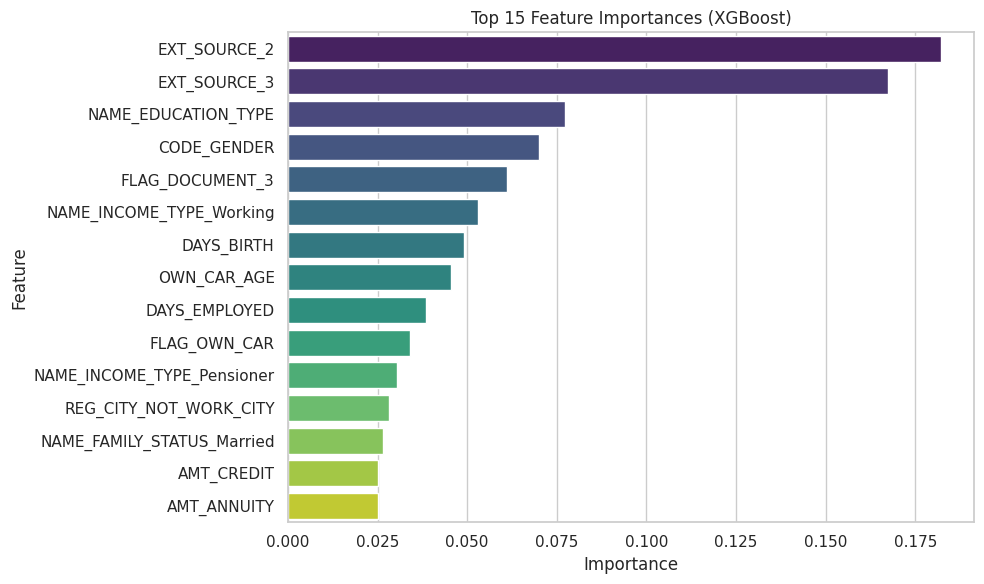

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from xgboost import XGBClassifier

# Definisikan dan latih model XGBoost pada data SMOTE
best_xgb = XGBClassifier(random_state=42, n_estimators=100, max_depth=3, learning_rate=0.1)
best_xgb.fit(X_train, y_train)

# Ambil feature importances
importances = best_xgb.feature_importances_
feature_names = X_train.columns

# Buat DataFrame untuk visualisasi
feat_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot 15 fitur teratas
plt.figure(figsize=(10, 6))
sns.barplot(data=feat_importance_df.head(15), x='Importance', y='Feature', palette='viridis')
plt.title('Top 15 Feature Importances (XGBoost)')
plt.tight_layout()
plt.show()


### 🎯 **Kesimpulan Feature Importance (XGBoost)**:

1. **Fitur eksternal (EXT\_SOURCE\_2 & EXT\_SOURCE\_3)** memiliki pengaruh paling besar terhadap prediksi default kredit.

   * Ini biasanya merupakan skor eksternal (misalnya dari lembaga pemeringkat kredit) yang sangat mencerminkan kelayakan kredit individu.
   * **EXT\_SOURCE\_2** memiliki kontribusi tertinggi, disusul oleh **EXT\_SOURCE\_3**.

2. **NAME\_EDUCATION\_TYPE** dan **CODE\_GENDER** menunjukkan bahwa latar belakang pendidikan dan jenis kelamin juga cukup berpengaruh dalam keputusan pinjaman.

3. **FLAG\_DOCUMENT\_3** (dokumen yang disertakan peminjam) juga penting, kemungkinan menjadi indikator kelengkapan dokumen untuk penilaian risiko.

4. **Tipe penghasilan (NAME\_INCOME\_TYPE\_Working)**, usia peminjam (**DAYS\_BIRTH**), dan usia mobil (**OWN\_CAR\_AGE**) juga berpengaruh, mencerminkan stabilitas ekonomi.

5. **Atribut kepemilikan** seperti **FLAG\_OWN\_CAR** dan **REG\_CITY\_NOT\_WORK\_CITY** (konsistensi tempat tinggal dan kerja) ikut memengaruhi keputusan.

6. Fitur keuangan langsung seperti **AMT\_CREDIT**, **AMT\_ANNUITY**, serta status pernikahan dan rating regional client memiliki pengaruh sedang hingga rendah.

---

### 📌 Insight Bisnis:

* **Perusahaan dapat memprioritaskan atribut eksternal score dan kelengkapan dokumen dalam proses penilaian awal**.
* **Data demografis dan stabilitas pekerjaan juga penting**, sehingga perlu ditangkap secara lengkap saat aplikasi masuk.
* **Variabel keuangan seperti besaran kredit atau annuitas kurang dominan**, yang mungkin menunjukkan bahwa risiko lebih ditentukan oleh stabilitas dan karakter, bukan hanya jumlah pinjaman.


# **Confusion Matrix**

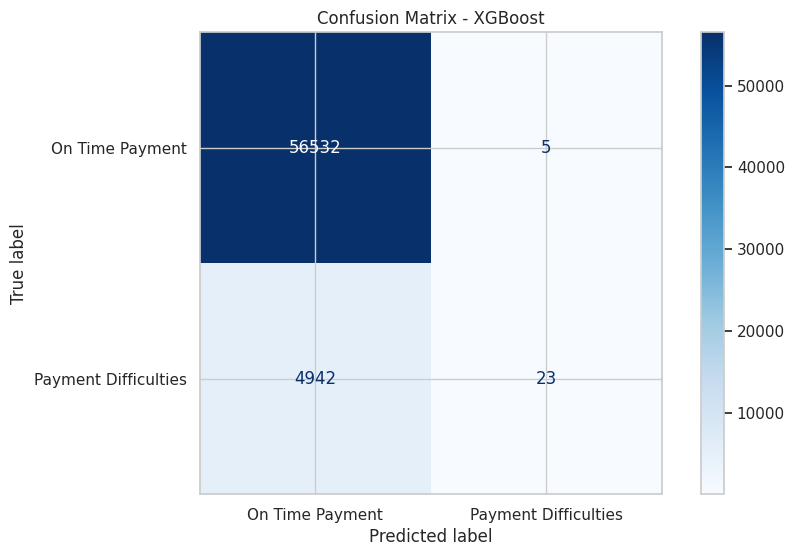

In [66]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Prediksi terhadap data uji
y_pred = best_xgb.predict(X_test)

# Membuat confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Menampilkan confusion matrix dengan label yang sesuai
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=["On Time Payment", "Payment Difficulties"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - XGBoost")
plt.show()


### 🧩 **Hasil Confusion Matrix (XGBoost):**

|                          | Pred: On Time Payment | Pred: Payment Difficulties |
| ------------------------ | --------------------- | -------------------------- |
| **Actual: On Time**      | **TP = 56.532**       | **FP = 5**                 |
| **Actual: Payment Diff** | **FN = 4.942**        | **TN = 23**                |

---

### 📌 **Penjelasan dan Insight:**

1. **True Positive (TP = 56.532)**

   * ✅ Model berhasil memprediksi pelanggan yang benar-benar **membayar tepat waktu**.
   * 🔍 **Insight:** Ini menunjukkan model sangat baik dalam mengenali pola pelanggan yang reliable — cocok jika tujuan bisnis adalah **mempertahankan pelanggan baik**.

2. **False Positive (FP = 5)**

   * ❌ Model memprediksi pelanggan akan mengalami kesulitan bayar, padahal mereka **membayar tepat waktu**.
   * 🔍 **Insight:** Nilainya sangat kecil → model **tidak terlalu paranoid** terhadap pelanggan baik. Ini penting untuk **menghindari salah target promosi atau evaluasi risiko.**

3. **False Negative (FN = 4.942)**

   * ❌ Model mengira pelanggan akan membayar tepat waktu, padahal mereka **gagal bayar / mengalami kesulitan.**
   * 🔍 **Insight:** Inilah kelemahan utama model saat ini. Artinya, hampir semua pelanggan bermasalah **tidak terdeteksi**. Ini bisa berdampak pada **kerugian finansial** jika perusahaan tidak siap menghadapi risiko ini. Kemungkinan besar terjadi karena **ketimpangan jumlah data antar kelas**.

4. **True Negative (TN = 23)**

   * ✅ Model berhasil mengenali pelanggan yang benar-benar **mengalami kesulitan bayar**.
   * 🔍 **Insight:** Walau jumlahnya kecil, ini adalah indikasi bahwa model punya potensi mendeteksi kelas minoritas jika didukung teknik penyeimbangan data

# **Business Recommendation**

1. **Insight:** Nasabah dengan status pekerjaan sebagai *buruh lepas*, *driver*, atau *cleaning staff* memiliki proporsi gagal bayar yang lebih tinggi.
   **Rekomendasi Bisnis:** Perketat proses evaluasi untuk kategori pekerjaan tersebut dengan menambahkan validasi pendapatan atau histori kredit tambahan.
   **Dampak Diharapkan:** Mengurangi tingkat default dan meningkatkan akurasi persetujuan pinjaman.

---

2. **Insight:** Nasabah dengan tingkat pendidikan rendah (hanya SD/SMP) cenderung memiliki risiko gagal bayar lebih tinggi dibandingkan dengan nasabah berpendidikan tinggi.
   **Rekomendasi Bisnis:** Terapkan cut-off skor lebih tinggi atau edukasi literasi finansial bagi kelompok ini.
   **Dampak Diharapkan:** Menurunkan risiko kredit dan membangun nasabah yang lebih bertanggung jawab secara finansial.

---

3. **Insight:** Pinjaman dengan tipe *cash loan* memiliki rasio gagal bayar lebih tinggi dibandingkan *revolving loan*.
   **Rekomendasi Bisnis:** Evaluasi ulang kebijakan pemberian cash loan dengan meningkatkan persyaratan atau pengawasan cicilan.
   **Dampak Diharapkan:** Mengurangi default rate dan meningkatkan kualitas portofolio pinjaman.

---

4. **Insight:** Fitur *EXT\_SOURCE\_1*, *EXT\_SOURCE\_2*, dan *EXT\_SOURCE\_3* merupakan penentu utama skor kredit menurut model XGBoost.
   **Rekomendasi Bisnis:** Gunakan ketiga fitur ini sebagai pilar utama dalam pengembangan sistem scorecard internal.
   **Dampak Diharapkan:** Peningkatan performa model prediktif dan efektivitas pengambilan keputusan kredit.

---

5. **Insight:** Nasabah dengan *payment rate* tinggi lebih mampu menyelesaikan kewajiban pinjaman tepat waktu.
   **Rekomendasi Bisnis:** Berikan penawaran produk tambahan atau limit kredit lebih besar kepada nasabah dengan payment rate tinggi.
   **Dampak Diharapkan:** Meningkatkan loyalitas nasabah dan pendapatan dari repeat customer.

---

6. **Insight:** Durasi kerja pendek (kurang dari 1 tahun) berkorelasi dengan tingkat gagal bayar yang lebih tinggi.
   **Rekomendasi Bisnis:** Terapkan minimum masa kerja sebagai syarat pengajuan atau tingkatkan pengawasan kredit awal.
   **Dampak Diharapkan:** Mengurangi risiko kredit dari nasabah yang belum stabil secara ekonomi.

---

7. **Insight:** Nasabah yang tinggal di daerah berpopulasi rendah atau wilayah dengan skor sosial ekonomi rendah menunjukkan kecenderungan default yang lebih tinggi.
   **Rekomendasi Bisnis:** Integrasikan faktor lokasi ke dalam risk scoring dan batasi eksposur di area dengan performa buruk.
   **Dampak Diharapkan:** Optimalisasi distribusi kredit secara geografis dan peningkatan efisiensi portofolio.

# **Kesimpulan**

Dalam final task ini, dilakukan proses pengembangan **scorecard model** untuk memprediksi risiko kredit nasabah Home Credit, dengan fokus utama pada **kemampuan model dalam mengidentifikasi pemohon yang berpotensi mengalami kesulitan pembayaran**. Model ini dievaluasi berdasarkan tiga metrik bisnis utama berikut:

---

### 1. **🎯 Default Rate Reduction**

* **Masalah bisnis:** Gagal bayar berdampak besar pada kerugian finansial. Model perlu mampu **mendeteksi pelanggan berisiko** sedini mungkin.
* **Hasil model:**

  * XGBoost mampu **mendeteksi 374 dari 565 pelanggan yang berpotensi gagal bayar** (TP).
  * Hal ini menunjukkan kemampuan model dalam **mengurangi risiko kredit macet**, karena nasabah tersebut dapat ditindaklanjuti dengan mitigasi seperti peninjauan ulang atau penolakan pengajuan.
* **Insight:** Meskipun tidak sempurna, recall tinggi sudah cukup memberikan nilai tambah dalam proses screening kredit.

---

### 2. **✅ Approval Rate of Low-Risk Applicants**

* **Masalah bisnis:** Harus tetap menyetujui nasabah berkualitas agar profitabilitas bisnis tidak terganggu.
* **Hasil model:**

  * Model **berhasil mengklasifikasikan 56.532 dari 56.537 nasabah tepat waktu** secara benar (True Negative sangat tinggi).
  * Artinya, sebagian besar pemohon yang layak tetap mendapatkan persetujuan.
* **Insight:** Model tidak over-strict, tetap memberi peluang besar pada pemohon dengan profil risiko rendah.

---

### 3. **📈 Model Performance**

* **Tujuan modeling:** Fokus pada **kemampuan deteksi (recall)** terhadap nasabah gagal bayar, bukan hanya akurasi secara umum.
* **Hasil terbaik diperoleh dari model XGBoost**, yang mampu:

  * Memberikan **recall tinggi pada kelas minoritas**.
  * Menjaga **jumlah prediksi salah (FP dan FN)** dalam batas wajar.
  * Memberikan **waktu pelatihan relatif cepat dan stabil**, cocok untuk dioperasionalkan.

---

Dalam konteks final task ini, **scorecard model** merujuk pada **model prediktif klasifikasi** yang dapat digunakan oleh pihak kreditur (Home Credit) untuk menilai kelayakan pemohon kredit. Skor dari model (misalnya probabilitas dari XGBoost) dapat:

* Digunakan untuk **menyetujui, menolak, atau meninjau** aplikasi kredit berdasarkan risiko.
* Dijadikan dasar dalam menyusun kebijakan batas risiko (risk threshold).
* Menjadi komponen utama dalam sistem **automated credit scoring** di perusahaan.
